<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Convolutional-Neural-Networks" data-toc-modified-id="Convolutional-Neural-Networks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Convolutional Neural Networks</a></span><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#-SGD-" data-toc-modified-id="-SGD--1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span> SGD </a></span></li><li><span><a href="#-Adam-" data-toc-modified-id="-Adam--1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span> Adam </a></span></li><li><span><a href="#-rmsprop-" data-toc-modified-id="-rmsprop--1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span> rmsprop </a></span></li></ul></li></ul></li></ul></div>

# Convolutional Neural Networks

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## Data Exploration

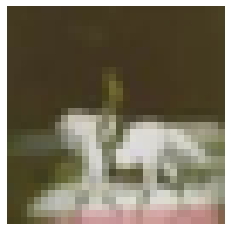

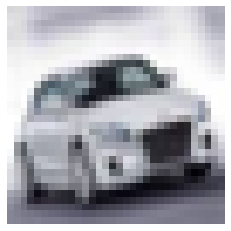

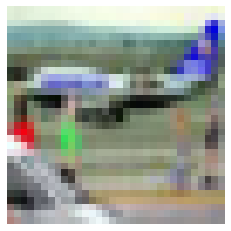

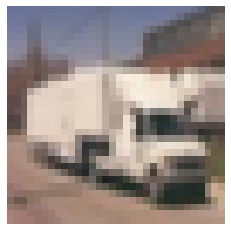

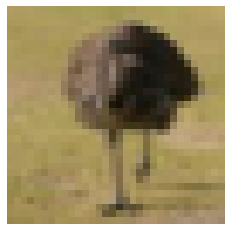

In [33]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

for i in np.random.randint(0,len(X_train),5):
    plt.figure()
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.show()

## Preprocessing

In [34]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.8, random_state=42)

## Training

In [35]:
cnn = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu",  input_shape=x_train.shape[1:]),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 64)          3

<h3> SGD </h3>

In [36]:
cnn.compile(optimizer="sgd",loss="categorical_crossentropy" ,metrics=["Precision"])

history = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
313/313 [==============================] - 34s 110ms/step - loss: 2.2995 - precision: 0.0000e+00 - val_loss: 2.2897 - val_precision: 0.0000e+00
Epoch 2/10
313/313 [==============================] - 34s 109ms/step - loss: 2.2439 - precision: 0.6667 - val_loss: 2.1755 - val_precision: 0.0000e+00
Epoch 3/10
313/313 [==============================] - 34s 109ms/step - loss: 2.1692 - precision: 0.3977 - val_loss: 2.1735 - val_precision: 0.5516
Epoch 4/10
313/313 [==============================] - 35s 110ms/step - loss: 2.1200 - precision: 0.4138 - val_loss: 2.0517 - val_precision: 0.7207
Epoch 5/10
313/313 [==============================] - 34s 109ms/step - loss: 2.0882 - precision: 0.3929 - val_loss: 2.1719 - val_precision: 1.0000
Epoch 6/10
313/313 [==============================] - 34s 109ms/step - loss: 2.0506 - precision: 0.5058 - val_loss: 2.0652 - val_precision: 0.8182
Epoch 7/10
313/313 [==============================] - 34s 109ms/step - loss: 2.0123 - precision: 0.5069 - 

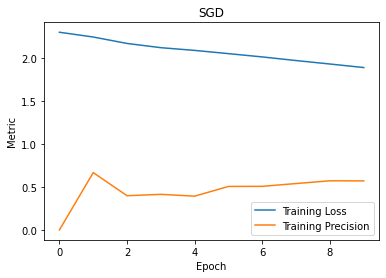

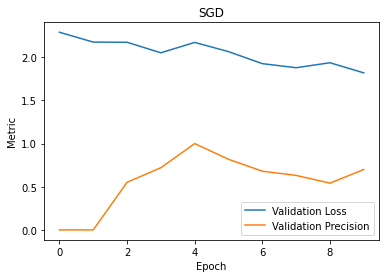

In [37]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['precision'], label='Training Precision')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('SGD')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.title('SGD')
plt.ylabel('Metric')
plt.legend()
plt.show()

In [38]:
y_pred_sgd = np.argmax(cnn.predict(X_test), axis=1)

print(classification_report(np.argmax(Y_test, axis=1), y_pred_sgd))

              precision    recall  f1-score   support

           0       0.41      0.43      0.42      1000
           1       0.36      0.63      0.46      1000
           2       0.37      0.07      0.11      1000
           3       0.30      0.06      0.09      1000
           4       0.19      0.04      0.07      1000
           5       0.35      0.24      0.29      1000
           6       0.28      0.69      0.40      1000
           7       0.29      0.41      0.34      1000
           8       0.37      0.41      0.39      1000
           9       0.38      0.39      0.39      1000

    accuracy                           0.34     10000
   macro avg       0.33      0.34      0.30     10000
weighted avg       0.33      0.34      0.30     10000



<h3> Adam </h3>

In [26]:
cnn.compile(optimizer="adam",loss="mean_squared_error" ,metrics=["Precision"])
history = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
313/313 [==============================] - 36s 116ms/step - loss: 0.0805 - precision: 0.5530 - val_loss: 0.0776 - val_precision: 0.6343
Epoch 2/10
313/313 [==============================] - 35s 112ms/step - loss: 0.0760 - precision: 0.5868 - val_loss: 0.0712 - val_precision: 0.6866
Epoch 3/10
313/313 [==============================] - 38s 120ms/step - loss: 0.0719 - precision: 0.6376 - val_loss: 0.0676 - val_precision: 0.6670
Epoch 4/10
313/313 [==============================] - 39s 125ms/step - loss: 0.0677 - precision: 0.6669 - val_loss: 0.0643 - val_precision: 0.6749
Epoch 5/10
313/313 [==============================] - 39s 124ms/step - loss: 0.0652 - precision: 0.6957 - val_loss: 0.0638 - val_precision: 0.6711
Epoch 6/10
313/313 [==============================] - 35s 113ms/step - loss: 0.0627 - precision: 0.7067 - val_loss: 0.0623 - val_precision: 0.6904
Epoch 7/10
313/313 [==============================] - 36s 114ms/step - loss: 0.0603 - precision: 0.7218 - val_loss: 0.

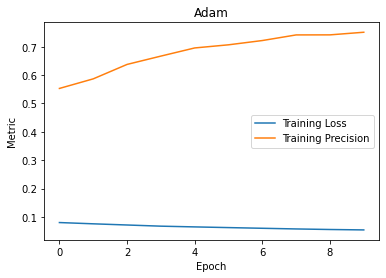

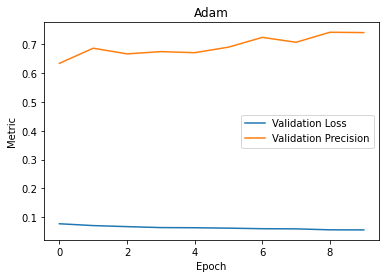

In [27]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['precision'], label='Training Precision')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Adam')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.title('Adam')
plt.ylabel('Metric')
plt.legend()
plt.show()

In [28]:
y_pred_adam = np.argmax(cnn.predict(X_test), axis=1)

print(classification_report(np.argmax(Y_test, axis=1), y_pred_adam))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1000
           1       0.66      0.79      0.72      1000
           2       0.42      0.43      0.42      1000
           3       0.38      0.31      0.34      1000
           4       0.53      0.27      0.36      1000
           5       0.46      0.58      0.51      1000
           6       0.64      0.69      0.67      1000
           7       0.65      0.60      0.63      1000
           8       0.61      0.73      0.67      1000
           9       0.66      0.61      0.63      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.55     10000
weighted avg       0.56      0.56      0.55     10000



<h3> rmsprop </h3>

In [29]:
cnn.compile(optimizer="rmsprop",loss="mean_squared_error" ,metrics=["Precision"])
history = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
313/313 [==============================] - 36s 115ms/step - loss: 0.0530 - precision: 0.7549 - val_loss: 0.0614 - val_precision: 0.6474
Epoch 2/10
313/313 [==============================] - 35s 113ms/step - loss: 0.0506 - precision: 0.7609 - val_loss: 0.0550 - val_precision: 0.7081
Epoch 3/10
313/313 [==============================] - 35s 113ms/step - loss: 0.0500 - precision: 0.7609 - val_loss: 0.0560 - val_precision: 0.7177
Epoch 4/10
313/313 [==============================] - 35s 113ms/step - loss: 0.0485 - precision: 0.7737 - val_loss: 0.0560 - val_precision: 0.7044
Epoch 5/10
313/313 [==============================] - 35s 113ms/step - loss: 0.0475 - precision: 0.7702 - val_loss: 0.0549 - val_precision: 0.7111
Epoch 6/10
313/313 [==============================] - 35s 113ms/step - loss: 0.0463 - precision: 0.7738 - val_loss: 0.0554 - val_precision: 0.7174
Epoch 7/10
313/313 [==============================] - 36s 114ms/step - loss: 0.0457 - precision: 0.7803 - val_loss: 0.

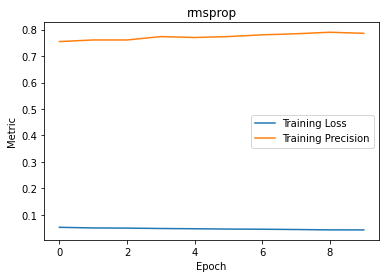

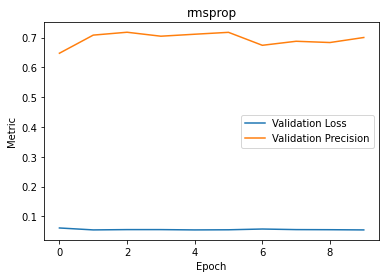

In [30]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['precision'], label='Training Precision')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('rmsprop')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.title('rmsprop')
plt.ylabel('Metric')
plt.legend()
plt.show()

In [31]:
y_pred_rmsprop = np.argmax(cnn.predict(X_test), axis=1)

print(classification_report(np.argmax(Y_test, axis=1), y_pred_rmsprop))

              precision    recall  f1-score   support

           0       0.66      0.56      0.61      1000
           1       0.71      0.78      0.74      1000
           2       0.54      0.40      0.46      1000
           3       0.43      0.34      0.38      1000
           4       0.43      0.57      0.49      1000
           5       0.54      0.55      0.54      1000
           6       0.60      0.76      0.67      1000
           7       0.69      0.60      0.64      1000
           8       0.76      0.65      0.70      1000
           9       0.61      0.73      0.66      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.60      0.59      0.59     10000

